Ноутбук для проверки функций расчета свойств нефти.

Запускаются все функции, строятся графики для различных комбинаций параметров, проверяются агрументы в виде чисел и массивов, тестируются методы расчета.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neftpy.upvt_np_vect as pvt
import neftpy.upvt_oil as pvto 

import matplotlib.pyplot as plt
import numpy as np

# Давление насыщения

Сравнение расчетов по базовым корреляциям для расчета давления насыщения.

- `unf_pb_Standing_MPaa`
- `unf_pb_Valko_MPaa`
- `unf_pb_Glaso_MPaa`

Проверяет возможность задания значений как массивов



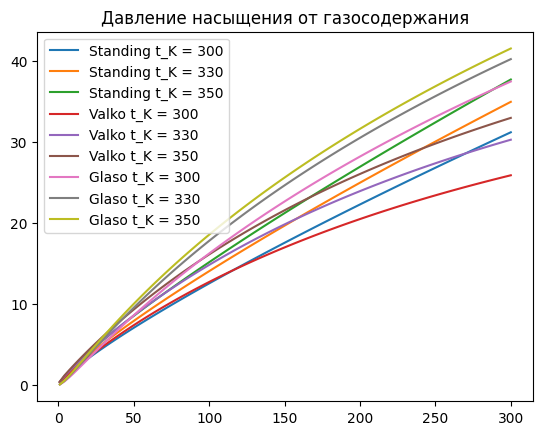

In [5]:
rsb_set = np.linspace(1,300,100)
t_K_set = np.array([300, 330, 350])

# для построения нескольких графиков смешаем в сетку
# первая переменная дает линии
t_K_mesh, rsb_mesh = np.meshgrid(t_K_set, rsb_set)

# построим линии
plt.plot(rsb_mesh, 
         pvto.unf_pb_Standing_MPaa(rsb_m3m3=rsb_mesh, 
                                   t_K=t_K_mesh, 
                                   gamma_gas=0.8, 
                                   gamma_oil=0.86),
         label = [f'Standing t_K = {t}' for t in t_K_set])
plt.plot(rsb_mesh, 
         pvto.unf_pb_Valko_MPaa(rsb_m3m3=rsb_mesh, 
                                t_K=t_K_mesh, 
                                gamma_gas=0.8, 
                                gamma_oil=0.86),
         label = [f'Valko t_K = {t}' for t in t_K_set])
plt.plot(rsb_mesh, 
         pvto.unf_pb_Glaso_MPaa(rsb_m3m3=rsb_mesh, 
                                t_K=t_K_mesh, 
                                gamma_gas=0.8, 
                                gamma_oil=0.86),
         label = [f'Glaso t_K = {t}' for t in t_K_set])
plt.title('Давление насыщения от газосодержания')
plt.legend()
plt.show()

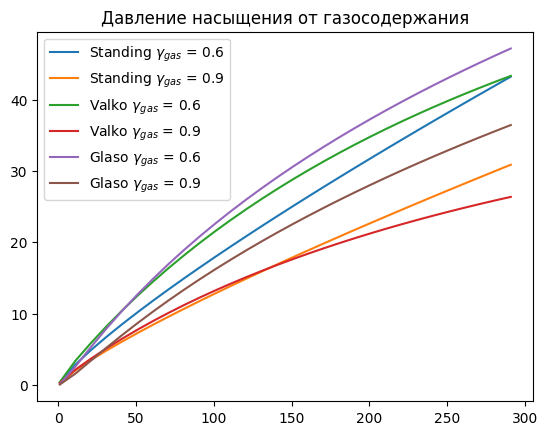

In [6]:
# проверим построение, если все графики заданы как массивы

rsb_set = np.arange(1,300,10)
t_K_set = np.array([300, 330, 350])
gamma_gas_set = [0.6, 0.9]

gamma_gas_mesh, rsb_mesh = np.meshgrid(gamma_gas_set, rsb_set)
gamma_oil_mesh = np.full_like(gamma_gas_mesh, 0.86, dtype=float)
t_K_mesh = np.full_like(gamma_gas_mesh, 330, dtype=float)

plt.plot(rsb_mesh, 
         pvto.unf_pb_Standing_MPaa(rsb_m3m3=rsb_mesh, 
                                   t_K=t_K_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Standing $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas_set])
plt.plot(rsb_mesh, 
         pvto.unf_pb_Valko_MPaa(rsb_m3m3=rsb_mesh, 
                                   t_K=t_K_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Valko $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas_set])
plt.plot(rsb_mesh, 
         pvto.unf_pb_Glaso_MPaa(rsb_m3m3=rsb_mesh, 
                                   t_K=t_K_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Glaso $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas_set])
plt.title('Давление насыщения от газосодержания')
plt.legend()
plt.show()

# Газосодержание в нефти

Полезно разделять расчет газосодержания насыщенной нефти $r_{sb}$ (при давлении насыщения) и расчет газосодержания недонасыщенной нефти $r_s$ (при произвольном давлении и известном давлении насыщения).

## Газосодержание насыщенной нефти (при известном давлении насыщения)

In [5]:
# проверим построение, если все графики заданы как массивы
p_MPaa = np.linspace(0.1, 30, 10) 
t_K = np.array([300, 330])
pb_MPaa = np.array([0, 10])
rsb_m3m3 = np.array([100, 200]) 
gamma_oil = np.array([0.82, 0.88])
gamma_gas = np.array([0.8, 0.6])

gamma_gas_mesh, p_mesh = np.meshgrid(gamma_gas, p_MPaa)

gamma_oil_mesh = np.full_like(gamma_gas_mesh, gamma_gas[0], dtype=float)
rsb_m3m3_mesh = np.full_like(gamma_gas_mesh, rsb_m3m3[0], dtype=float)
pb_MPaa_mesh = np.full_like(gamma_gas_mesh, pb_MPaa[0], dtype=float)
t_K_mesh = np.full_like(gamma_gas_mesh, t_K[0], dtype=float)


plt.plot(p_mesh, 
         pvto.unf_rsb_Standing_m3m3(rsp_m3m3=p_mesh,
                                   t_K=t_K_mesh, 
                                   pb_MPaa=pb_MPaa_mesh,
                                   rsb_m3m3=rsb_m3m3_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Standing  без калибровок $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas])

plt.plot(p_mesh, 
         pvto.unf_rs_Velarde_m3m3(p_MPaa=p_mesh,
                                   t_K=t_K_mesh, 
                                   pb_MPaa=pb_MPaa_mesh,
                                   rsb_m3m3=rsb_m3m3_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Velarde  без калибровок $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas])
pb_MPaa_mesh = np.full_like(gamma_gas_mesh, pb_MPaa[1], dtype=float)
plt.plot(p_mesh, 
         pvto.unf_rs_Standing_m3m3(p_MPaa=p_mesh,
                                   t_K=t_K_mesh, 
                                   pb_MPaa=pb_MPaa_mesh,
                                   rsb_m3m3=rsb_m3m3_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Standing с калибровкой $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas])

plt.title('Газосодержание от давления')
plt.legend()
plt.show()

TypeError: unf_rsb_Standing_m3m3() got an unexpected keyword argument 't_K'

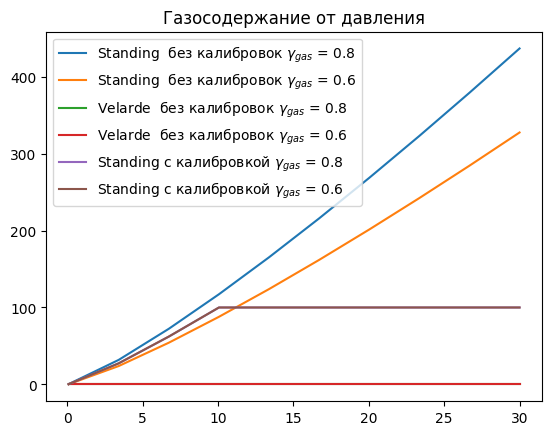

In [9]:
# проверим построение, если все графики заданы как массивы
p_MPaa = np.linspace(0.1, 30, 10) 
t_K = np.array([300, 330])
pb_MPaa = np.array([0, 10])
rsb_m3m3 = np.array([100, 200]) 
gamma_oil = np.array([0.82, 0.88])
gamma_gas = np.array([0.8, 0.6])

gamma_gas_mesh, p_mesh = np.meshgrid(gamma_gas, p_MPaa)

gamma_oil_mesh = np.full_like(gamma_gas_mesh, gamma_gas[0], dtype=float)
rsb_m3m3_mesh = np.full_like(gamma_gas_mesh, rsb_m3m3[0], dtype=float)
pb_MPaa_mesh = np.full_like(gamma_gas_mesh, pb_MPaa[0], dtype=float)
t_K_mesh = np.full_like(gamma_gas_mesh, t_K[0], dtype=float)


plt.plot(p_mesh, 
         pvto.unf_rs_Standing_m3m3(p_MPaa=p_mesh,
                                   t_K=t_K_mesh, 
                                   pb_MPaa=pb_MPaa_mesh,
                                   rsb_m3m3=rsb_m3m3_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Standing  без калибровок $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas])

plt.plot(p_mesh, 
         pvto.unf_rs_Velarde_m3m3(p_MPaa=p_mesh,
                                   t_K=t_K_mesh, 
                                   pb_MPaa=pb_MPaa_mesh,
                                   rsb_m3m3=rsb_m3m3_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Velarde  без калибровок $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas])
pb_MPaa_mesh = np.full_like(gamma_gas_mesh, pb_MPaa[1], dtype=float)
plt.plot(p_mesh, 
         pvto.unf_rs_Standing_m3m3(p_MPaa=p_mesh,
                                   t_K=t_K_mesh, 
                                   pb_MPaa=pb_MPaa_mesh,
                                   rsb_m3m3=rsb_m3m3_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh),
         label = [f'Standing с калибровкой $\\gamma_{{gas}}$ = {gg}' for gg in gamma_gas])

plt.title('Газосодержание от давления')
plt.legend()
plt.show()

In [8]:
pvto.unf_rs_Velarde_m3m3(p_MPaa=p_mesh,
                                   t_K=t_K_mesh, 
                                   pb_MPaa=[20],
                                   rsb_m3m3=rsb_m3m3_mesh, 
                                   gamma_gas=gamma_gas_mesh, 
                                   gamma_oil=gamma_oil_mesh)

array([[  0.        ,   0.        ],
       [ 27.76639738,  19.2639803 ],
       [ 42.15967378,  34.40417346],
       [ 55.66330881,  49.28944153],
       [ 69.54023598,  64.85280831],
       [ 84.28800467,  81.67336223],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ],
       [100.        , 100.        ]])

# Плотность нефти

In [2]:
print(pvto.unf_rho_oil_Mccain_kgm3())

[842.38166972]


In [3]:
p_MPaa = np.array([1 ])
t_K = np.array([300 ])
pb_MPaa = np.array([12])
rs_m3m3 = np.array([121])  
co_1MPa = np.array([3e-3])
gamma_oil = np.array([0.86, 0.87])
gamma_gas = np.array([0.8]) 
gamma_gassp = np.array([0])

In [4]:
print(pvto.unf_rho_oil_Mccain_kgm3(p_MPaa = p_MPaa,
                                    t_K = t_K,
                                    pb_MPaa = pb_MPaa,
                                    rs_m3m3 = rs_m3m3,
                                    co_1MPa = co_1MPa,
                                    gamma_oil = gamma_oil,
                                    gamma_gas = gamma_gas,
                                    gamma_gassp = gamma_gassp))

[748.5066161  757.40120864]


In [ ]:
def ro_po_equation(ro_po, vars):
        gamma_gassp, gamma_gas, gamma_oil, rs_scfstb = vars
        ro_a = -49.8930 + 85.0149 * gamma_gassp - 3.70373 * gamma_gassp * ro_po +\
            0.0479818 * gamma_gassp * ro_po ** 2 + 2.98914 * ro_po - 0.0356888 * ro_po ** 2
        return (rs_scfstb * gamma_gas + 4600 * gamma_oil) / (73.71 + rs_scfstb * gamma_gas / ro_a) -ro_po

In [ ]:
ro_po_equation(np.array([1,2]), (gamma_gassp, gamma_gas, gamma_oil, rs_m3m3))

array([55.56561013, 55.31555732])